## Final Project Part 3:

### Group Members: Shantanu Pagare

### Importing the necessary libraries:

In [1]:
import pandas as pd
import altair as alt
import numpy as np

In [2]:
# Setting display options:
pd.set_option('display.max_rows', None)

pd.options.display.max_columns = 50

#### Some information on data the dataset is less than 100MB so it can eaasily be put on GitHub for the final Project part 3. 

In [3]:
# Importing and reading the dataset:
df = pd.read_csv('data_proj.csv')
df.head()

,report_table_number_state,table_2_urban_utility_scale_pv_gwh,table_2_urban_utility_scale_pv_gw,table_2_urban_utility_scale_pv_km2,table_3_rural_utility_scale_pv_gwh,table_3_rural_utility_scale_pv_gw,table_3_rural_utility_scale_pv_km2,table_4_rooftop_pv_gwh,table_4_rooftop_pv_gw,table_5_csp_gwh,table_5_csp_gw,table_5_csp_km2,table_6_onshore_wind_gwh,table_6_onshore_wind_gw,table_6_onshore_wind_km2,table_7_offshore_wind_gwh,table_7_offshore_wind_gw,table_7_offshore_wind_km2,table_8_biopower_solid_gwh,table_8_biopower_solid_gw,table_8_biopower_solid_bdt,table_8_biopower_gaseous_gwh,table_8_biopower_gaseous_gw,table_8_biopower_gaseous_tonnes_ch4,table_9_geothermal_hydrothermal_gwh,table_9_geothermal_hydrothermal_gw,table_10_egs_geothermal_gwh,table_10_egs_geothermal_gw,table_11_hydropower_gwh,table_11_hydropower_gw,table_11_hydropower_count_of_sites,Years
0,Alabama,35850.62851,20.453177,426.107849,3.706839e+06,2114.792060,44058.16791,15475.968620,12.516076,0.000000e+00,0.000000,0.0000,2.830225e+02,0.118200,23.64000,0.000,0.00000,0.00,11193.4559,1.419769,10175869,1533.077443,0.194454,326186.69,0.000000,0.00000,5.354895e+05,67.921043,4102.565755,0.936659,2435,1980
1,Alaska,166.00000,0.112000,2.348800,8.282976e+06,9005.192669,187608.18060,NaN,1.291509,0.000000e+00,0.000000,0.0000,1.373433e+06,493.346362,98669.27243,NaN,NaN,NaN,513.4767,0.065129,466797,61.837571,0.007843,13156.93,15437.267760,1.95814,NaN,NaN,23675.571930,5.405382,3053,1975
2,Arizona,121305.87750,52.611054,1096.063625,1.186769e+07,5147.086733,107230.97360,22736.083220,14.879973,1.254433e+07,3527.623739,107238.9035,2.603638e+04,10.904100,2180.82000,NaN,NaN,NaN,1087.5755,0.137947,988705,837.486279,0.106226,178188.57,8329.529597,1.05640,1.239148e+06,157.172465,1303.222021,0.297539,1958,1978
3,Arkansas,28960.88134,15.957316,332.444079,4.986389e+06,2747.477737,57239.11953,8484.950618,6.773149,0.000000e+00,0.000000,0.0000,2.289232e+04,9.200300,1840.06000,NaN,NaN,NaN,14381.4440,1.824130,13074040,1063.036835,0.134835,226178.05,0.000000,0.00000,6.286217e+05,79.733850,6093.400569,1.391187,3268,1982
4,California,246008.10790,111.403807,2320.912651,8.855917e+06,4010.367374,83549.32030,106411.151200,75.908383,8.490916e+06,2725.675782,82859.8809,8.986220e+04,34.110200,6822.04000,2662579.509,654.83335,130966.67,12408.2695,1.573855,11280245,15510.991700,1.967401,3300211.00,130921.068900,16.60550,1.344179e+06,170.494600,30023.578290,6.854698,9692,2015


#### After some research I found that the renewable energy market took a boom in the USA and in the whole world from 1975 and I made a column accordingly of 'Years' in the dataset and randomly also, with some research, filled the years where the boom could have taken place in a particular state. This all will lead to better visualizations if a time aspect is in the dataset as explained by the professor as well.

In [4]:
df.columns  

Index(['report_table_number_state', 'table_2_urban_utility_scale_pv_gwh',
       'table_2_urban_utility_scale_pv_gw',
       'table_2_urban_utility_scale_pv_km2',
       'table_3_rural_utility_scale_pv_gwh',
       'table_3_rural_utility_scale_pv_gw',
       'table_3_rural_utility_scale_pv_km2', 'table_4_rooftop_pv_gwh',
       'table_4_rooftop_pv_gw', 'table_5_csp_gwh', 'table_5_csp_gw',
       'table_5_csp_km2', 'table_6_onshore_wind_gwh',
       'table_6_onshore_wind_gw', 'table_6_onshore_wind_km2',
       'table_7_offshore_wind_gwh', 'table_7_offshore_wind_gw',
       'table_7_offshore_wind_km2', 'table_8_biopower_solid_gwh',
       'table_8_biopower_solid_gw', 'table_8_biopower_solid_bdt',
       'table_8_biopower_gaseous_gwh', 'table_8_biopower_gaseous_gw',
       'table_8_biopower_gaseous_tonnes_ch4',
       'table_9_geothermal_hydrothermal_gwh',
       'table_9_geothermal_hydrothermal_gw', 'table_10_egs_geothermal_gwh',
       'table_10_egs_geothermal_gw', 'table_11_hydropower_

In [5]:
### A lot of NaN values were found so I turned them into zeroes:
df = df.fillna(0)
df

,report_table_number_state,table_2_urban_utility_scale_pv_gwh,table_2_urban_utility_scale_pv_gw,table_2_urban_utility_scale_pv_km2,table_3_rural_utility_scale_pv_gwh,table_3_rural_utility_scale_pv_gw,table_3_rural_utility_scale_pv_km2,table_4_rooftop_pv_gwh,table_4_rooftop_pv_gw,table_5_csp_gwh,table_5_csp_gw,table_5_csp_km2,table_6_onshore_wind_gwh,table_6_onshore_wind_gw,table_6_onshore_wind_km2,table_7_offshore_wind_gwh,table_7_offshore_wind_gw,table_7_offshore_wind_km2,table_8_biopower_solid_gwh,table_8_biopower_solid_gw,table_8_biopower_solid_bdt,table_8_biopower_gaseous_gwh,table_8_biopower_gaseous_gw,table_8_biopower_gaseous_tonnes_ch4,table_9_geothermal_hydrothermal_gwh,table_9_geothermal_hydrothermal_gw,table_10_egs_geothermal_gwh,table_10_egs_geothermal_gw,table_11_hydropower_gwh,table_11_hydropower_gw,table_11_hydropower_count_of_sites,Years
0,Alabama,35850.628510,20.453177,426.107849,3.706839e+06,2114.792060,44058.167910,15475.968620,12.516076,0.000000e+00,0.000000,0.0000,2.830225e+02,0.118200,23.640000,0.000000e+00,0.00000,0.00,11193.4559,1.419769,10175869,1533.077443,0.194454,326186.69,0.000000,0.00000,5.354895e+05,67.921043,4102.565755,0.936659,2435,1980
1,Alaska,166.000000,0.112000,2.348800,8.282976e+06,9005.192669,187608.180600,0.000000,1.291509,0.000000e+00,0.000000,0.0000,1.373433e+06,493.346362,98669.272430,0.000000e+00,0.00000,0.00,513.4767,0.065129,466797,61.837571,0.007843,13156.93,15437.267760,1.95814,0.000000e+00,0.000000,23675.571930,5.405382,3053,1975
2,Arizona,121305.877500,52.611054,1096.063625,1.186769e+07,5147.086733,107230.973600,22736.083220,14.879973,1.254433e+07,3527.623739,107238.9035,2.603638e+04,10.904100,2180.820000,0.000000e+00,0.00000,0.00,1087.5755,0.137947,988705,837.486279,0.106226,178188.57,8329.529597,1.05640,1.239148e+06,157.172465,1303.222021,0.297539,1958,1978
3,Arkansas,28960.881340,15.957316,332.444079,4.986389e+06,2747.477737,57239.119530,8484.950618,6.773149,0.000000e+00,0.000000,0.0000,2.289232e+04,9.200300,1840.060000,0.000000e+00,0.00000,0.00,14381.4440,1.824130,13074040,1063.036835,0.134835,226178.05,0.000000,0.00000,6.286217e+05,79.733850,6093.400569,1.391187,3268,1982
4,California,246008.107900,111.403807,2320.912651,8.855917e+06,4010.367374,83549.320300,106411.151200,75.908383,8.490916e+06,2725.675782,82859.8809,8.986220e+04,34.110200,6822.040000,2.662580e+06,654.83335,130966.67,12408.2695,1.573855,11280245,15510.991700,1.967401,3300211.00,130921.068900,16.60550,1.344179e+06,170.494600,30023.578290,6.854698,9692,2015
5,Colorado,43470.501440,19.167192,399.316500,1.023808e+07,4514.218007,94046.208480,16162.171470,11.796668,9.154524e+06,3097.836194,94173.4668,1.096036e+06,387.219400,77443.880000,0.000000e+00,0.00000,0.00,2913.3082,0.369522,2648462,1224.210175,0.155278,260470.25,8953.673597,1.13540,1.251658e+06,158.759254,7789.128915,1.778340,5060,1982
6,Connecticut,7716.647187,4.833023,100.687982,1.962775e+04,12.293079,256.105804,6616.198688,5.903443,0.000000e+00,0.000000,0.0000,6.191349e+01,0.026500,5.300000,2.654536e+04,7.17050,1434.10,494.7525,0.062754,449775,414.667511,0.052596,88227.13,0.000000,0.00000,5.607844e+04,7.112942,922.457854,0.210607,659,2003
7,Delaware,14856.468170,9.119547,189.990556,2.723326e+05,167.169615,3482.700320,2185.431677,1.875725,0.000000e+00,0.000000,0.0000,2.171998e+01,0.009500,1.900000,6.065402e+04,15.03840,3007.68,512.3822,0.064990,465802,385.463732,0.048892,82013.56,0.000000,0.00000,2.281335e+04,2.893627,30.790340,0.007030,25,1995
8,District of Columbia,8.440000,0.005380,0.112074,0.000000e+00,0.000000,0.000000,2490.190287,2.100237,0.000000e+00,0.000000,0.0000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.00000,0.00,61.7980,0.007838,56180,4.595660,0.000583,977.80,0.000000,0.00000,6.978494e+02,0.088515,0.831247,0.000190,2,2008
9,Florida,72787.192620,39.850365,830.215942,5.137347e+06,2812.653444,58596.946750,63986.638860,49.406525,3.586872e+02,0.129761,3.9447,9.530880e-01,0.000400,0.080000,3.468449e+04,9.64855,1929.71,9664.4064,1.225825,87858

### Choosing important columns like Geothermal Gigawatt and Hydropower Gigawatt/hour for our analysis:

In [6]:
# Checking to see the min and max values of the column:
df['table_10_egs_geothermal_gw'].min()

0.0

In [7]:
df['table_10_egs_geothermal_gw'].max()

384.3545114

In [8]:
df['table_10_egs_geothermal_gw']

0      67.921043
1       0.000000
2     157.172465
3      79.733850
4     170.494600
5     158.759254
6       7.112942
7       2.893627
8       0.088515
9      47.458304
10     44.800414
11      0.000000
12    125.983894
13     85.750373
14     55.080986
15     76.914040
16    125.529674
17     61.473715
18     61.424577
19     47.827892
20     10.990491
21     11.698032
22     58.073350
23     46.903168
24     70.910209
25    105.967098
26    208.942633
27    117.706298
28    160.093183
29     13.231154
30      4.468599
31    179.855197
32     47.615499
33     53.366481
34    104.036828
35     62.902298
36     98.892364
37    115.944362
38     41.519606
39      1.457576
40     46.182773
41    116.942226
42     54.335368
43    384.354511
44    119.150268
45      4.517594
46     36.876793
47     71.413446
48     33.152778
49     82.086912
50    135.727900
Name: table_10_egs_geothermal_gw, dtype: float64

### Making a histogram to see distributions of values:

#### Also, found that the values are right skewed for this column

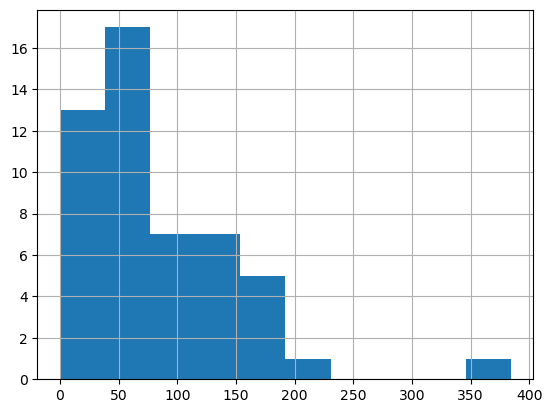

In [9]:
df['table_10_egs_geothermal_gw'].hist()

### Binning the values so that they can be turned into bar graphs in the final visualization

### The binning and data manipulation was important for both the columns so that the numerical values can be turned into categorical values. This finally helped me produce the interactive visualization accurately.

### Took -1 as a starting value for bins as it was not converting the 0.00 float value into the desired categorical value like '0-35'

In [10]:
# define the bin edges
bins = [-1, 35.00, 70.00, 105.00, 140.00, 175.00, 210.00, 245.00, 280.00, 315.00, 350.00, 385.00]

# use pandas.cut() to bin the values into categories:
df['geothermal_categories'] = pd.cut(df['table_10_egs_geothermal_gw'], 
                                     bins=bins, labels=['0-35', '35-70', '70-105', '105-140', '140-175',
                                                        '175-210', '210-245', '245-280', 
                                                        '280-315', '315-350', '350-385'])

In [11]:
df['table_10_egs_geothermal_gw']

0      67.921043
1       0.000000
2     157.172465
3      79.733850
4     170.494600
5     158.759254
6       7.112942
7       2.893627
8       0.088515
9      47.458304
10     44.800414
11      0.000000
12    125.983894
13     85.750373
14     55.080986
15     76.914040
16    125.529674
17     61.473715
18     61.424577
19     47.827892
20     10.990491
21     11.698032
22     58.073350
23     46.903168
24     70.910209
25    105.967098
26    208.942633
27    117.706298
28    160.093183
29     13.231154
30      4.468599
31    179.855197
32     47.615499
33     53.366481
34    104.036828
35     62.902298
36     98.892364
37    115.944362
38     41.519606
39      1.457576
40     46.182773
41    116.942226
42     54.335368
43    384.354511
44    119.150268
45      4.517594
46     36.876793
47     71.413446
48     33.152778
49     82.086912
50    135.727900
Name: table_10_egs_geothermal_gw, dtype: float64

In [12]:
df['geothermal_categories']

0       35-70
1        0-35
2     140-175
3      70-105
4     140-175
5     140-175
6        0-35
7        0-35
8        0-35
9       35-70
10      35-70
11       0-35
12    105-140
13     70-105
14      35-70
15     70-105
16    105-140
17      35-70
18      35-70
19      35-70
20       0-35
21       0-35
22      35-70
23      35-70
24     70-105
25    105-140
26    175-210
27    105-140
28    140-175
29       0-35
30       0-35
31    175-210
32      35-70
33      35-70
34     70-105
35      35-70
36     70-105
37    105-140
38      35-70
39       0-35
40      35-70
41    105-140
42      35-70
43    350-385
44    105-140
45       0-35
46      35-70
47     70-105
48       0-35
49     70-105
50    105-140
Name: geothermal_categories, dtype: category
Categories (11, object): ['0-35' < '35-70' < '70-105' < '105-140' ... '245-280' < '280-315' < '315-350' < '350-385']

### Binning the values so that they can be turned into bar graphs in the final visualization

#### Also, found that the values are right skewed for this column

In [13]:
df['table_11_hydropower_gwh'].min()

0.831246702

In [14]:
df['table_11_hydropower_gwh'].max()

30023.57829

### Making a histogram to see distributions of values:

#### Also, found that the values are right skewed for this column

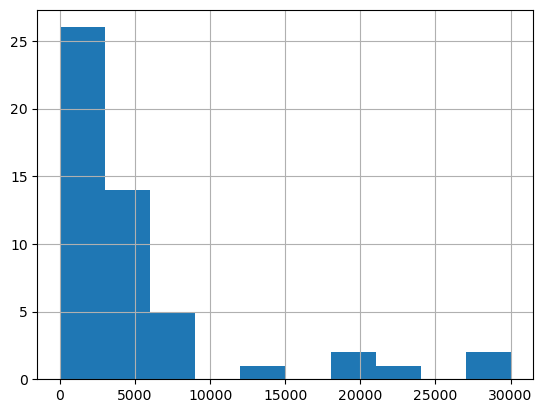

In [15]:
df['table_11_hydropower_gwh'].hist()

In [16]:
df['table_11_hydropower_gwh']

0      4102.565755
1     23675.571930
2      1303.222021
3      6093.400569
4     30023.578290
5      7789.128915
6       922.457854
7        30.790340
8         0.831247
9       682.106477
10     1988.009884
11     2602.270883
12    18757.802470
13     4882.504927
14     2394.285479
15     2818.186183
16     2507.927700
17     4255.367149
18     2423.330776
19     3916.418167
20      814.015197
21     1196.720649
22     1180.949475
23     1254.876952
24     2211.168497
25     7198.497709
26    14546.556940
27     3142.175665
28      845.963744
29     1740.913841
30      549.388036
31     1362.699974
32     6711.248074
33     3036.527335
34      347.126569
35     3045.955837
36     3015.828400
37    18184.432280
38     8368.101262
39       59.465658
40     1888.694766
41     1047.059027
42     5744.536648
43     3006.080053
44     3528.343490
45     1710.274435
46     3656.759027
47    27248.932520
48     4408.434916
49     2286.758764
50     4445.247448
Name: table_11_hydropower_gwh, 

In [17]:
# define the bin edges
bins = [-1, 2500.00, 5000.00, 7500.00, 10000.00, 12500.00, 15000.00, 17500.00, 20000.00, 22500.00, 25000.00, 
        27500.00, 30100.00]

# use pandas.cut() to bin the values into categories
df['hydropower_categories'] = pd.cut(df['table_11_hydropower_gwh'], 
                                     bins=bins, labels=['0-2500', '2500-5000', '5000-7500', '7500-10000', 
                                                        '10000-12500', '12500-15000', '15000-17500', '17500-20000', 
                                                        '20000-22500', '22500-25000', '25000-27500', '27500-30100'])

In [18]:
df['hydropower_categories']

0       2500-5000
1     22500-25000
2          0-2500
3       5000-7500
4     27500-30100
5      7500-10000
6          0-2500
7          0-2500
8          0-2500
9          0-2500
10         0-2500
11      2500-5000
12    17500-20000
13      2500-5000
14         0-2500
15      2500-5000
16      2500-5000
17      2500-5000
18         0-2500
19      2500-5000
20         0-2500
21         0-2500
22         0-2500
23         0-2500
24         0-2500
25      5000-7500
26    12500-15000
27      2500-5000
28         0-2500
29         0-2500
30         0-2500
31         0-2500
32      5000-7500
33      2500-5000
34         0-2500
35      2500-5000
36      2500-5000
37    17500-20000
38     7500-10000
39         0-2500
40         0-2500
41         0-2500
42      5000-7500
43      2500-5000
44      2500-5000
45         0-2500
46      2500-5000
47    25000-27500
48      2500-5000
49         0-2500
50      2500-5000
Name: hydropower_categories, dtype: category
Categories (12, object): ['0-2500' < 

### Also was looking to see if the dataframe looks good and this will help in the final Visualization later:

In [19]:
df[['geothermal_categories','report_table_number_state']]

,geothermal_categories,report_table_number_state
0,35-70,Alabama
1,0-35,Alaska
2,140-175,Arizona
3,70-105,Arkansas
4,140-175,California
5,140-175,Colorado
6,0-35,Connecticut
7,0-35,Delaware
8,0-35,District of Columbia
9,35-70,Florida


### Visualization 1:

#### In this visualization I have taken states on the Y-Axis and binned the Hydropower columns values in t such a way that the visualization shows the number of hydropower sites across the USA. The more darker the blue color is the more hydropower sites are present in that particular state, for example Oklahoma or Oregon. On the X-Axis the values are binned from 0 to 2500 --- till 30100, so the values are binned accordingly to show how many sites belong to that state in those particular binned values. 

In [20]:
df['geothermal_categories'].values

['35-70', '0-35', '140-175', '70-105', '140-175', ..., '35-70', '70-105', '0-35', '70-105', '105-140']
Length: 51
Categories (11, object): ['0-35' < '35-70' < '70-105' < '105-140' ... '245-280' < '280-315' < '315-350' < '350-385']

In [21]:
geo_new_category = ['0-35', '35-70', '70-105', '105-140', '140-175',
                    '175-210', '210-245', '245-280', '280-315', '315-350', '350-385']

In [22]:
# hydro_new_category = ['0-2500', '2500-5000', '5000-7500', '7500-10000', 
#                       '10000-12500', '12500-15000', '15000-17500', '17500-20000', 
#                       '20000-22500', '22500-25000', '25000-27500', '27500-30100']

In [23]:
input_dropdown = alt.binding_select(options=geo_new_category, name='Geothermal (gw)')

In [24]:
selection = alt.selection_single(fields=['geothermal_categories'], bind=input_dropdown)

In [25]:
fig = alt.Chart(df).mark_bar().encode(
    alt.Y('count()',  title='Count of States'),
    alt.X('hydropower_categories:O')
).properties(width=400, height=400).add_selection(
    selection).transform_filter(selection)

In [26]:
fig

alt.Chart(...)

In [27]:
my_jekyll_dir = 'C://Users//shant//Downloads//UIUC MSIM//Sem_4//Data_Viz//Github_proj//Shantanu97brr.github.io//assets//json//'

In [28]:
fig.save(my_jekyll_dir + 'Geo_Hydropower_by_States.json')

### Visulaization Explanation:

#### The graph only shows two factors of renewable energy generation in the USA, mainly Hydropower and Geothermal energy, from a lot of different factors from the dataset like Wind Power, Gaseous Power, Solar Power and so on. The above visualization explians how many Hydropower and Geothermal energy sites are there across the USA and they are segregated in such a way that when Geopower dropdown is changed the Hydropower on the X-axis also changes. 

#### For example if range is provided between 35-70 in GigaWatts (gw) for Geopower than different Hydropower sites in Gigawatt Hours (gwh) will aslo be displayed and on the Y-Axis 'Count of states' can be observed where more number of Geothermal and Hydropower sites are present in each state for the following Geo and Hydro units of Power Usage.  

#### The graph is interactive and if as a viewer you want to understand what is going on in the visualization then it can be understood as follows. The graph basically shows the amount of energy usage/consumption done by the different states in the USA. Some states where less people live like in North Dakota or South Dakota, less energy is consumed in terms of electricity and water sources inside/below the Earth. 

#### More energy is used both in terms of electricity and water where more people live, like in the states of California, NY, IL and so on. The graph can help you understand in what states the most number of energy generating sites of Hydropower and Geothermal energy are and it can also help you understand how diverse and spread out the energy sites are across the United States.